# DSC Final Project - Matt Cano

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [47]:
users = pd.read_csv("Data/train_users_2.csv")
users.date_account_created = pd.to_datetime(users.date_account_created)
users.date_first_booking = pd.to_datetime(users.date_first_booking)
users.timestamp_first_active = pd.to_datetime(users.timestamp_first_active, format='%Y%m%d%H%M%S')
users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [48]:
# u2 = users.groupby('id').count()
# u2.date_account_created.value_counts()

In [49]:
# print users.date_account_created.isnull().sum()
# users.date_account_created.value_counts()
# users.groupby([date_account_created.Month])['id'].count()

In [50]:
# # How in feature engineering I can create a diff column
# u2 = users[['id', 'date_account_created', 'timestamp_first_active']]
# u2['diff'] = u2.timestamp_first_active - u2.date_account_created
# u2.head()

In [51]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null datetime64[ns]
timestamp_first_active     213451 non-null datetime64[ns]
date_first_booking         88908 non-null datetime64[ns]
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: datetime64[ns](3), float64(1), int64(1), object(11)
memory

In [52]:
print users.shape
users.describe()

(213451, 16)


,age,signup_flow
count,125461.000000,213451.000000
mean,49.668335,3.267387
std,155.666612,7.637707
min,1.000000,0.000000
25%,NaN,0.000000
50%,NaN,0.000000
75%,NaN,0.000000
max,2014.000000,25.000000


Null Values: 0
-unknown-    95688
FEMALE       63041
MALE         54440
OTHER          282
Name: gender, dtype: int64


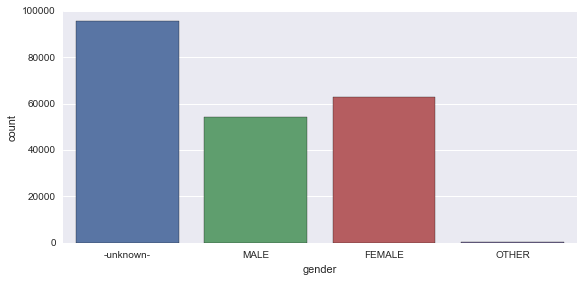

In [53]:
print "Null Values:", users.gender.isnull().sum()
print users.gender.value_counts()
sns.factorplot('gender', data=users, kind='count', aspect=2.0)

Null Values: 87990
101.0       23
102.0       34
103.0       26
104.0       48
105.0     1131
106.0       17
107.0       23
108.0       15
109.0       31
110.0      196
111.0        2
112.0        1
113.0        4
115.0       13
132.0        1
150.0        1
1924.0       2
1925.0       1
1926.0       1
1927.0       1
1928.0       2
1929.0       2
1931.0       3
1932.0       3
1933.0       1
1935.0       1
1936.0       2
1938.0       1
1942.0       1
1947.0       2
1949.0       3
1952.0       1
1953.0       1
1995.0       1
2008.0       1
2013.0      39
2014.0     710
Name: age, dtype: int64
Age > 110: 801


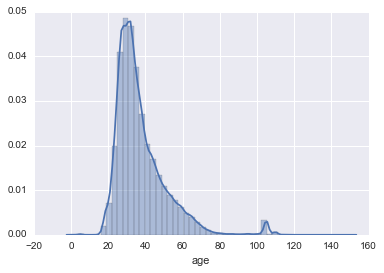

In [54]:
print "Null Values:", users.age.isnull().sum()
print users[users.age > 100].age.value_counts(sort=False)
print "Age > 110:", len(users[(users.age > 110)])
# users[(users.age > 100)].age.hist()
sns.distplot(users[(users.age < 1924)].age)
# sns.distplot(users[(users.age > 100) & (users.age < 1924)].age)
# sns.factorplot('age', data=users, kind='count', aspect=2.0)

/Users/MattCano/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


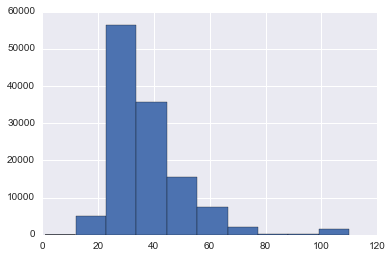

In [55]:
# Need to correct age values > 1924 (779 rows) assuming year of birth instead of age
# Changing 801 age values > 110 to Null since likely erroneous entries (known ~750 values 1924-1914, but most of those 1914)
users.age[users.age > 110] = None
users.age.hist()

Null Values: 0
basic       152897
facebook     60008
google         546
Name: signup_method, dtype: int64


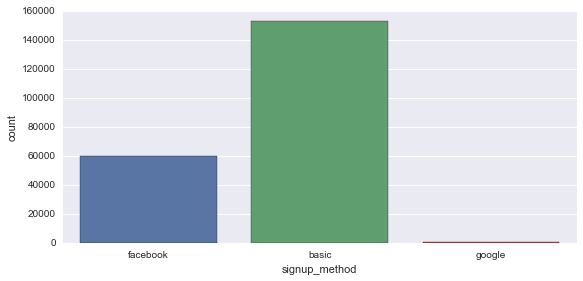

In [56]:
print "Null Values:", users.signup_method.isnull().sum()
print users.signup_method.value_counts()
sns.factorplot('signup_method', data=users, kind='count', aspect=2.0)

Null Values: 0
0     164739
1       1047
2       6881
3       8822
4          1
5         36
6        301
8        240
10         2
12      9329
15        10
16        11
20        14
21       196
23      2835
24      4328
25     14659
Name: signup_flow, dtype: int64


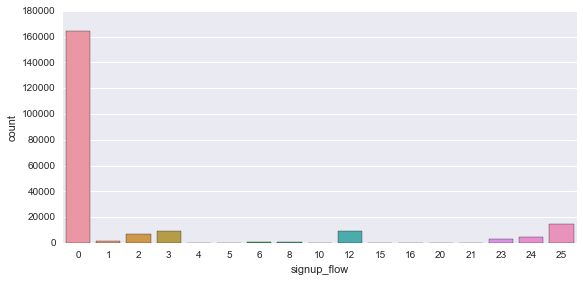

In [57]:
print "Null Values:", users.signup_flow.isnull().sum()
print users.signup_flow.value_counts(sort=False)
sns.factorplot('signup_flow', data=users, kind='count', aspect=2.0)

Null Values: 0
en    206314
zh      1632
fr      1172
es       915
ko       747
de       732
it       514
ru       389
pt       240
ja       225
sv       122
nl        97
tr        64
da        58
pl        54
cs        32
no        30
el        24
th        24
id        22
hu        18
fi        14
is         5
ca         5
hr         2
Name: language, dtype: int64


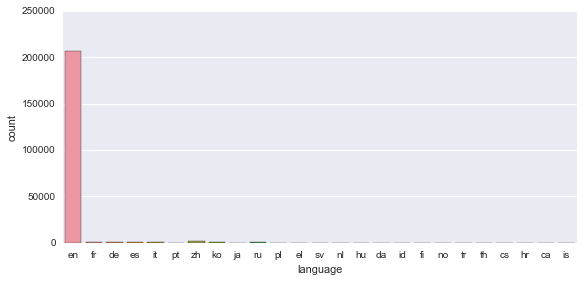

In [58]:
print "Null Values:", users.language.isnull().sum()
print users.language.value_counts(sort=True)
sns.factorplot('language', data=users, kind='count', aspect=2.0)

Null Values: 0
direct           137727
sem-brand         26045
sem-non-brand     18844
other              8961
seo                8663
api                8167
content            3948
remarketing        1096
Name: affiliate_channel, dtype: int64


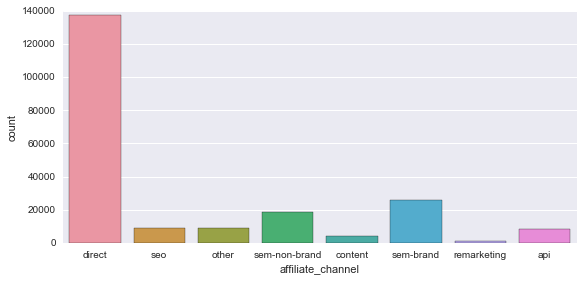

In [59]:
print "Null Values:", users.affiliate_channel.isnull().sum()
print users.affiliate_channel.value_counts(sort=True)
sns.factorplot('affiliate_channel', data=users, kind='count', aspect=2.0)

Null Values: 0
direct                 137426
google                  51693
other                   12549
craigslist               3471
bing                     2328
facebook                 2273
vast                      829
padmapper                 768
facebook-open-graph       545
yahoo                     496
gsp                       453
meetup                    347
email-marketing           166
naver                      52
baidu                      29
yandex                     17
wayn                        8
daum                        1
Name: affiliate_provider, dtype: int64


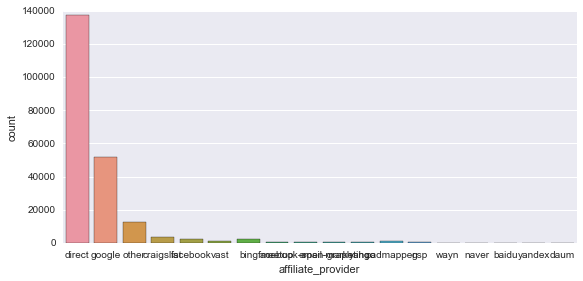

In [60]:
print "Null Values:", users.affiliate_provider.isnull().sum()
print users.affiliate_provider.value_counts(sort=True)
sns.factorplot('affiliate_provider', data=users, kind='count', aspect=2.0)

Null Values: 6065
untracked        109232
linked            46287
omg               43982
tracked-other      6156
product            1556
marketing           139
local ops            34
Name: first_affiliate_tracked, dtype: int64


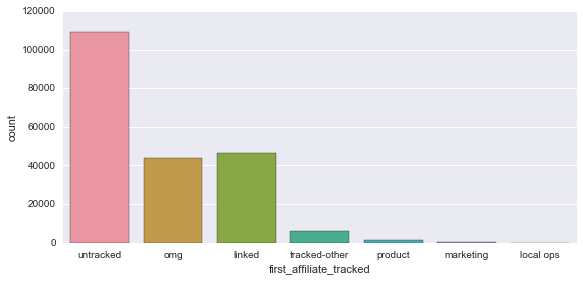

In [61]:
print "Null Values:", users.first_affiliate_tracked.isnull().sum()
print users.first_affiliate_tracked.value_counts(sort=True)
sns.factorplot('first_affiliate_tracked', data=users, kind='count', aspect=2.0)

Null Values: 0
Web        182717
iOS         19019
Moweb        6261
Android      5454
Name: signup_app, dtype: int64


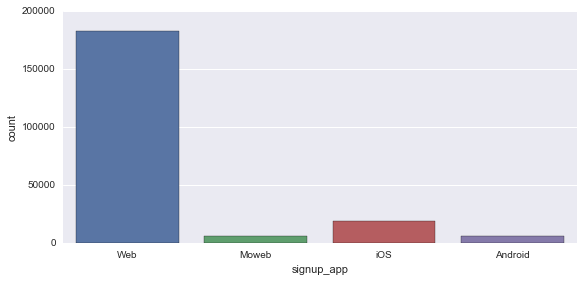

In [62]:
print "Null Values:", users.signup_app.isnull().sum()
print users.signup_app.value_counts(sort=True)
sns.factorplot('signup_app', data=users, kind='count', aspect=2.0)

Null Values: 0
Mac Desktop           89600
Windows Desktop       72716
iPhone                20759
iPad                  14339
Other/Unknown         10667
Android Phone          2803
Android Tablet         1292
Desktop (Other)        1199
SmartPhone (Other)       76
Name: first_device_type, dtype: int64


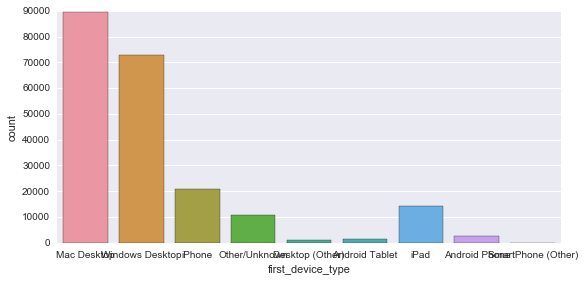

In [63]:
print "Null Values:", users.first_device_type.isnull().sum()
print users.first_device_type.value_counts(sort=True)
sns.factorplot('first_device_type', data=users, kind='count', aspect=2.0)

Null Values: 0
Chrome                  63845
Safari                  45169
Firefox                 33655
-unknown-               27266
IE                      21068
Mobile Safari           19274
Chrome Mobile            1270
Android Browser           851
AOL Explorer              245
Opera                     188
Silk                      124
Chromium                   73
BlackBerry Browser         53
Maxthon                    46
IE Mobile                  36
Apple Mail                 36
Sogou Explorer             33
Mobile Firefox             30
SiteKiosk                  24
RockMelt                   24
Iron                       17
IceWeasel                  13
Pale Moon                  12
Yandex.Browser             11
SeaMonkey                  11
CometBird                  11
Camino                      9
TenFourFox                  8
wOSBrowser                  6
CoolNovo                    6
Avant Browser               4
Opera Mini                  4
Mozilla                  

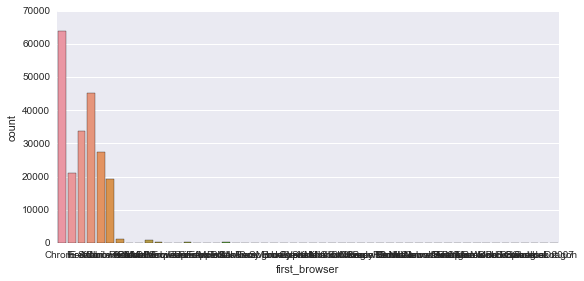

In [64]:
print "Null Values:", users.first_browser.isnull().sum()
print users.first_browser.value_counts(sort=True)
sns.factorplot('first_browser', data=users, kind='count', aspect=2.0)

Null Values: 0
NDF      124543
US        62376
other     10094
FR         5023
IT         2835
GB         2324
ES         2249
CA         1428
DE         1061
NL          762
AU          539
PT          217
Name: country_destination, dtype: int64


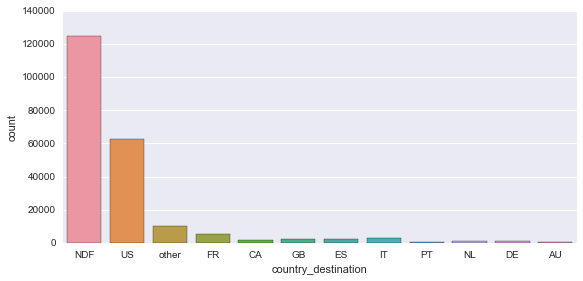

In [65]:
print "Null Values:", users.country_destination.isnull().sum()
print users.country_destination.value_counts(sort=True)
sns.factorplot('country_destination', data=users, kind='count', aspect=2.0)

In [66]:
# This is a large file (~700MB) so it takes a while to load...
# sessions = pd.read_csv("Data/sessions.csv")

In [67]:
# print sessions.shape
# sessions.head()

In [68]:
# Looking at the sessions data for one user
# sessions[sessions.user_id == 'd1mm9tcy42']

# Feature Engineering

In [69]:
# Creating a new column showing # of hours between account created and first active. 
# Negative value indicated first active before creating account
users['diff_created_active'] = (users.timestamp_first_active - users.date_account_created)/np.timedelta64(1,'h')
users.diff_created_active.value_counts(bins=10000, sort=False).head()
# users[['id', 'date_account_created', 'timestamp_first_active', 'diff_created_active']].sort_values(by='diff_created_active', ascending=False).head()

-34964.842221    1
-34926.392945    0
-34922.897556    0
-34919.402167    0
-34915.906778    0
Name: diff_created_active, dtype: int64

In [70]:
# Creating a new column showing # of HOURS between account created and first booking. 
# Negative value indicated first booked before creating account
users['diff_created_booked'] = (users.date_first_booking - users.date_account_created)/np.timedelta64(1,'h')
users.diff_created_booked.value_counts(bins=10, sort=True).head()

-1521.6    56694
 192.0     16453
 1905.6     4770
 3619.2     3777
 7046.4     3730
Name: diff_created_booked, dtype: int64

In [71]:
# Creating columns breaking out 'date_account_created' to month, season and day of week
users['account_created_month'] = users.date_account_created.map(lambda x: x.month)
# Day of week account created [0...6] = [M...Su]
users['account_created_dow'] = users.date_account_created.map(lambda x: x.dayofweek)
# Roughly season of year account created (N. Hemisphere), [1,2,3,4] = [Winter, Spring, Summer, Fall]
users['account_created_season'] = users.date_account_created.map(lambda x: (x.month-1)/3+1)
users[['date_account_created', 'account_created_month','account_created_season','account_created_dow']].head()

,date_account_created,account_created_month,account_created_season,account_created_dow
0,2010-06-28,6,2,0
1,2011-05-25,5,2,2
2,2010-09-28,9,3,1
3,2011-12-05,12,4,0
4,2010-09-14,9,3,1


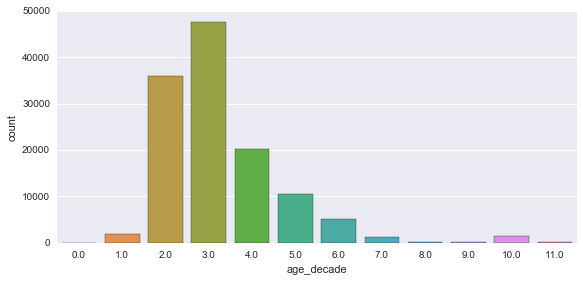

In [72]:
# Creating 'age_decade' column (e.g. 30 <= age < 40 is age_decade = 3)
users['age_decade'] = np.floor(users.age/10)
sns.factorplot('age_decade', data=users, kind='count', aspect=2.0)
# users[users.age < 10][['id','age', 'age_decade']].head()

In [73]:
dumm1 = pd.get_dummies(users.gender, prefix = 'gender')
dumm2 = pd.get_dummies(users.signup_method, prefix = 'su')
dumm3 = pd.get_dummies(users.age_decade, prefix = 'age')
dumm4 = pd.get_dummies(users.signup_app, prefix = 'app')
dumm5 = pd.get_dummies(users.first_device_type, prefix = 'dev')
dumm6 = pd.get_dummies(users.account_created_month, prefix = 'mo')
dumm7 = pd.get_dummies(users.account_created_dow, prefix = 'dow')
dumm8 = pd.get_dummies(users.account_created_season, prefix = 'season')
users = pd.concat([users, dumm1, dumm2, dumm3, dumm4, dumm5, dumm6, dumm7, dumm8], axis=1)
users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,dow_1,dow_2,dow_3,dow_4,dow_5,dow_6,season_1,season_2,season_3,season_4
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,-unknown-,NaN,facebook,0,en,direct,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.0,facebook,0,en,seo,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,-unknown-,41.0,basic,0,en,direct,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Setting Up Train and Test Sets

In [74]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 77 columns):
id                         213451 non-null object
date_account_created       213451 non-null datetime64[ns]
timestamp_first_active     213451 non-null datetime64[ns]
date_first_booking         88908 non-null datetime64[ns]
gender                     213451 non-null object
age                        124660 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
diff_created_active        213451 non-null float64
diff_created_bo

In [81]:
X = users.drop(['country_destination', 'date_account_created', 'timestamp_first_active', 
                'date_first_booking', 'gender', 'signup_method', 'signup_flow', 'language', 
                'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked', 
                'signup_app', 'first_device_type', 'first_browser', 'account_created_month', 
                'account_created_dow', 'account_created_season'], axis=1)
y = users.country_destination
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=0)

NameError: name 'train_test_split' is not defined